In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Self-Driving Automobiles (2)111.csv')

In [2]:
df.head(10)

Timestamp    Age  ...             Opinion Future
0  2021/07/31 1:07:29 AM GMT+6  21-30  ...            Positive    YES
1  2021/07/31 1:19:41 AM GMT+6  21-30  ...            Positive     NO
2  2021/07/31 1:23:18 AM GMT+6  21-30  ...            Positive    YES
3  2021/07/31 1:27:57 AM GMT+6  21-30  ...            Positive    YES
4  2021/07/31 1:54:55 AM GMT+6  21-30  ...            Positive    YES
5  2021/07/31 2:08:14 AM GMT+6  21-30  ...            Positive    YES
6  2021/07/31 2:25:45 AM GMT+6  21-30  ...            Positive    YES
7  2021/07/31 3:50:38 AM GMT+6  21-30  ...            Positive     NO
8  2021/07/31 8:34:00 AM GMT+6  21-30  ...  Extremely Positive    YES
9  2021/07/31 9:25:21 AM GMT+6  21-30  ...            Negative     NO

[10 rows x 7 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   281 non-null    object
 1   Age         281 non-null    object
 2   Gender      281 non-null    object
 3   Occupation  281 non-null    object
 4   District    281 non-null    object
 5   Opinion     281 non-null    object
 6   Future      281 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


In [4]:
df.isnull().sum()

Timestamp     0
Age           0
Gender        0
Occupation    0
District      0
Opinion       0
Future        0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [6]:
le = LabelEncoder()

In [7]:
df['Timestamp'] = le.fit_transform(df['Timestamp'])
df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['District'] = le.fit_transform(df['District'])
df['Opinion'] = le.fit_transform(df['Opinion'])
df['Future'] = le.fit_transform(df['Future'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff608eb9210>,
      dtype=object)

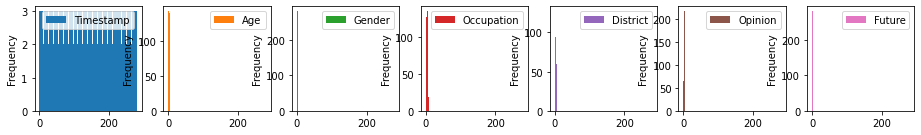

In [8]:
df.plot.hist(subplots=True, layout=(11,11), figsize=(25, 25), bins=100)

In [9]:
df.describe()

Timestamp         Age      Gender  ...    District     Opinion      Future
count  281.000000  281.000000  281.000000  ...  281.000000  281.000000  281.000000
mean   140.000000    2.832740    0.551601  ...    3.875445    3.800712    1.113879
std     81.261922    0.998461    0.498217  ...    1.916694    1.313175    0.993471
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     70.000000    2.000000    0.000000  ...    2.000000    3.000000    0.000000
50%    140.000000    2.000000    1.000000  ...    5.000000    4.000000    2.000000
75%    210.000000    4.000000    1.000000  ...    5.000000    5.000000    2.000000
max    280.000000    5.000000    1.000000  ...    8.000000    5.000000    2.000000

[8 rows x 7 columns]

In [10]:
df.head(10)

Timestamp  Age  Gender  Occupation  District  Opinion  Future
0         19    2       1           5         2        5       2
1         21    2       0           5         1        5       0
2         22    2       1           5         5        5       2
3         23    2       1           5         5        5       2
4         24    2       1           5         3        5       2
5         25    2       1           5         0        5       2
6         27    2       1           5         5        5       2
7         29    2       1           5         1        5       0
8         33    2       1           1         5        2       2
9         34    2       1           5         1        3       0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Timestamp   281 non-null    int64
 1   Age         281 non-null    int64
 2   Gender      281 non-null    int64
 3   Occupation  281 non-null    int64
 4   District    281 non-null    int64
 5   Opinion     281 non-null    int64
 6   Future      281 non-null    int64
dtypes: int64(7)
memory usage: 15.5 KB


In [12]:
 y = df['Age']
 x = df.drop([ 'Timestamp'], axis=1)

In [13]:
x

Age  Gender  Occupation  District  Opinion  Future
0      2       1           5         2        5       2
1      2       0           5         1        5       0
2      2       1           5         5        5       2
3      2       1           5         5        5       2
4      2       1           5         3        5       2
..   ...     ...         ...       ...      ...     ...
276    5       1           2         2        5       2
277    2       0           6         1        5       0
278    5       1           2         6        2       0
279    2       1           1         5        4       0
280    5       1           1         2        4       0

[281 rows x 6 columns]

In [14]:
y

0      2
1      2
2      2
3      2
4      2
      ..
276    5
277    2
278    5
279    2
280    5
Name: Age, Length: 281, dtype: int64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
x_train

Age  Gender  Occupation  District  Opinion  Future
277    2       0           6         1        5       0
80     2       1           3         1        5       2
251    2       1           5         5        2       2
173    2       0           3         5        5       0
169    2       1           3         2        5       2
..   ...     ...         ...       ...      ...     ...
8      2       1           1         5        2       2
136    4       1           0         4        2       2
141    3       0           2         1        5       0
199    4       0           6         1        5       2
204    4       0           1         5        2       2

[224 rows x 6 columns]

In [17]:
x_test

Age  Gender  Occupation  District  Opinion  Future
104    2       1           5         6        5       2
23     2       1           5         2        5       2
134    4       0           0         6        5       2
230    2       1           5         6        2       2
48     2       0           5         7        2       2
24     2       1           5         2        5       0
116    4       0           2         1        3       0
63     3       0           3         4        5       2
174    2       0           1         1        3       0
142    3       0           6         5        1       0
66     5       0           6         7        4       0
228    3       0           1         2        3       0
3      2       1           5         5        5       2
117    4       0           1         5        1       0
231    3       0           0         1        5       2
110    3       0           2         6        4       0
67     3       1           0         4        2       0
176    3       0           1         5        5       0
83     2       0           5         5        5       0
5      2       1           5         0        5       2
100    2       1           5         2        4       0
61     3       0           5         4        5       2
96     2       1           5         7        5       2
158    3       1           0         7        4       0
267    2       1           5         5        4       2
150    2       0           2         6        5       2
171    2       1           3         2        4       0
201    3       1           1         1        5       2
192    4       0           6         4        5       2
59     4       1           5         4        2       2
177    3       0           2         0        3       0
139    4       1           1         2        5       0
195    3       0           2         6        2       2
155    2       1           1         6        4       0
237    4       1           2         6        3       2
202    3       0           1         6        4       2
149    3       1           1         5        3       2
151    2       1           2         4        5       0
203    4       0           0         4        5       0
276    5       1           2         2        5       2
178    3       1           3         2        2       0
28     2       1           5         5        5       0
37     2       0           5         5        5       0
92     5       1           5         3        5       2
108    4       1           1         1        3       2
56     4       0           5         4        5       0
280    5       1           1         2        4       0
260    2       1           5         5        5       2
69     2       0           6         6        4       2
181    3       0           3         2        4       0
221    3       0           0         5        5       0
47     2       0           5         1        5       2
259    2       1           3         5        2       2
2      2       1           5         5        5       2
9      2       1           5         1        3       0
165    2       1           0         5        3       0
35     3       0           4         5        2       2

In [18]:
y_train

277    2
80     2
251    2
173    2
169    2
      ..
8      2
136    4
141    3
199    4
204    4
Name: Age, Length: 224, dtype: int64

In [19]:
y_test

104    2
23     2
134    4
230    2
48     2
24     2
116    4
63     3
174    2
142    3
66     5
228    3
3      2
117    4
231    3
110    3
67     3
176    3
83     2
5      2
100    2
61     3
96     2
158    3
267    2
150    2
171    2
201    3
192    4
59     4
177    3
139    4
195    3
155    2
237    4
202    3
149    3
151    2
203    4
276    5
178    3
28     2
37     2
92     5
108    4
56     4
280    5
260    2
69     2
181    3
221    3
47     2
259    2
2      2
9      2
165    2
35     3
Name: Age, dtype: int64

In [20]:
cm_algorithms_name =[]
true_positive = []
false_negative = []
false_positive = []
true_negative = []
 
 
algorithm_name = []
test_accuracy_data = []
cross_validation_accuracy_data = []

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [24]:
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
clf.score(x_train,y_train)

1.0

In [26]:
clf.score(x_test,y_test)

1.0

In [27]:
cross_val_score(clf, x, y, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
k = KNeighborsClassifier()
k.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
k.score(x_train,y_train)

0.8080357142857143

In [31]:
knn_test_accuracy=k.score(x_test,y_test)
knn_test_accuracy

0.6491228070175439

In [32]:
cross_val_score(k, x, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.65517241, 0.75      , 0.71428571, 0.64285714, 0.64285714,
       0.75      , 0.39285714, 0.53571429, 0.64285714, 0.89285714])

In [33]:
knn_cross_val=cross_val_score(k, x, y, cv=10).mean()
knn_cross_val

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.6619458128078819

In [34]:
y_pred = k.predict(x_test)
y_pred

array([2, 2, 4, 2, 2, 2, 3, 4, 2, 2, 4, 3, 2, 4, 2, 3, 3, 3, 2, 2, 2, 4,
       2, 3, 2, 3, 2, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 2, 2, 2, 4,
       4, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test,y_pred, labels=(1,0)).ravel()

In [37]:
graph = classification_report(y_test,y_pred, labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Und

In [40]:
cm_algorithms_name.append('KNN')
True_positive.append(tp)
False_negative.append(fn)
False_positive.append(fp)
True_negative.append(tn)
 
 
algorithm_name.append('KNN')
test_accuracy_data.append(knn_test_accuracy)
cross_validation_accuracy_data.append(knn_cross_val)

NameError: ignored

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
 n = GaussianNB()
 n.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
n.score(x_train,y_train)

1.0

In [44]:
naive_test_accuracy=n.score(x_test,y_test)
naive_test_accuracy

1.0

In [45]:
cross_val_score(n, x, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.93103448, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [46]:
naive_cross_val=cross_val_score(n, x, y, cv=10).mean()
naive_cross_val

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.993103448275862

In [47]:
y_pred=n.predict(x_test)
y_pred

array([2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 5, 3, 2, 4, 3, 3, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 3, 4, 4, 3, 4, 3, 2, 4, 3, 3, 2, 4, 5, 3, 2, 2, 5,
       4, 4, 5, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3])

In [ ]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()

In [49]:
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Und

In [ ]:
cm_algorithms_name.append('Naive Bayes')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('Naive Bayes')
test_accuracy_data.append(naive_test_accuracy)
cross_validation_accuracy_data.append(naive_cross_val)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
 d = DecisionTreeClassifier()
 d.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
d.score(x_train,y_train)

1.0

In [54]:
dt_test_Accuracy=d.score(x_test,y_test)
dt_test_Accuracy

1.0

In [55]:
cross_val_score(d, x, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.93103448, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [56]:
dt_cross_val=cross_val_score(d, x, y, cv=10).mean()
dt_cross_val

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.993103448275862

In [57]:
y_pred = d.predict(x_test)
y_pred

array([2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 5, 3, 2, 4, 3, 3, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 3, 4, 4, 3, 4, 3, 2, 4, 3, 3, 2, 4, 5, 3, 2, 2, 5,
       4, 4, 5, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3])

In [ ]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()

In [58]:
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Und

In [ ]:
cm_algorithms_name.append('Decision Tree')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('Decision Tree')
test_accuracy_data.append(dt_test_Accuracy)
cross_validation_accuracy_data.append(dt_cross_val)

In [59]:
#columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, df.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in x:
    ax.plot(x_data, df[column], label=column)
# set title and legend
ax.set_title('Self-Drive Automobile')
ax.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff60257ca90>,
      dtype=object)

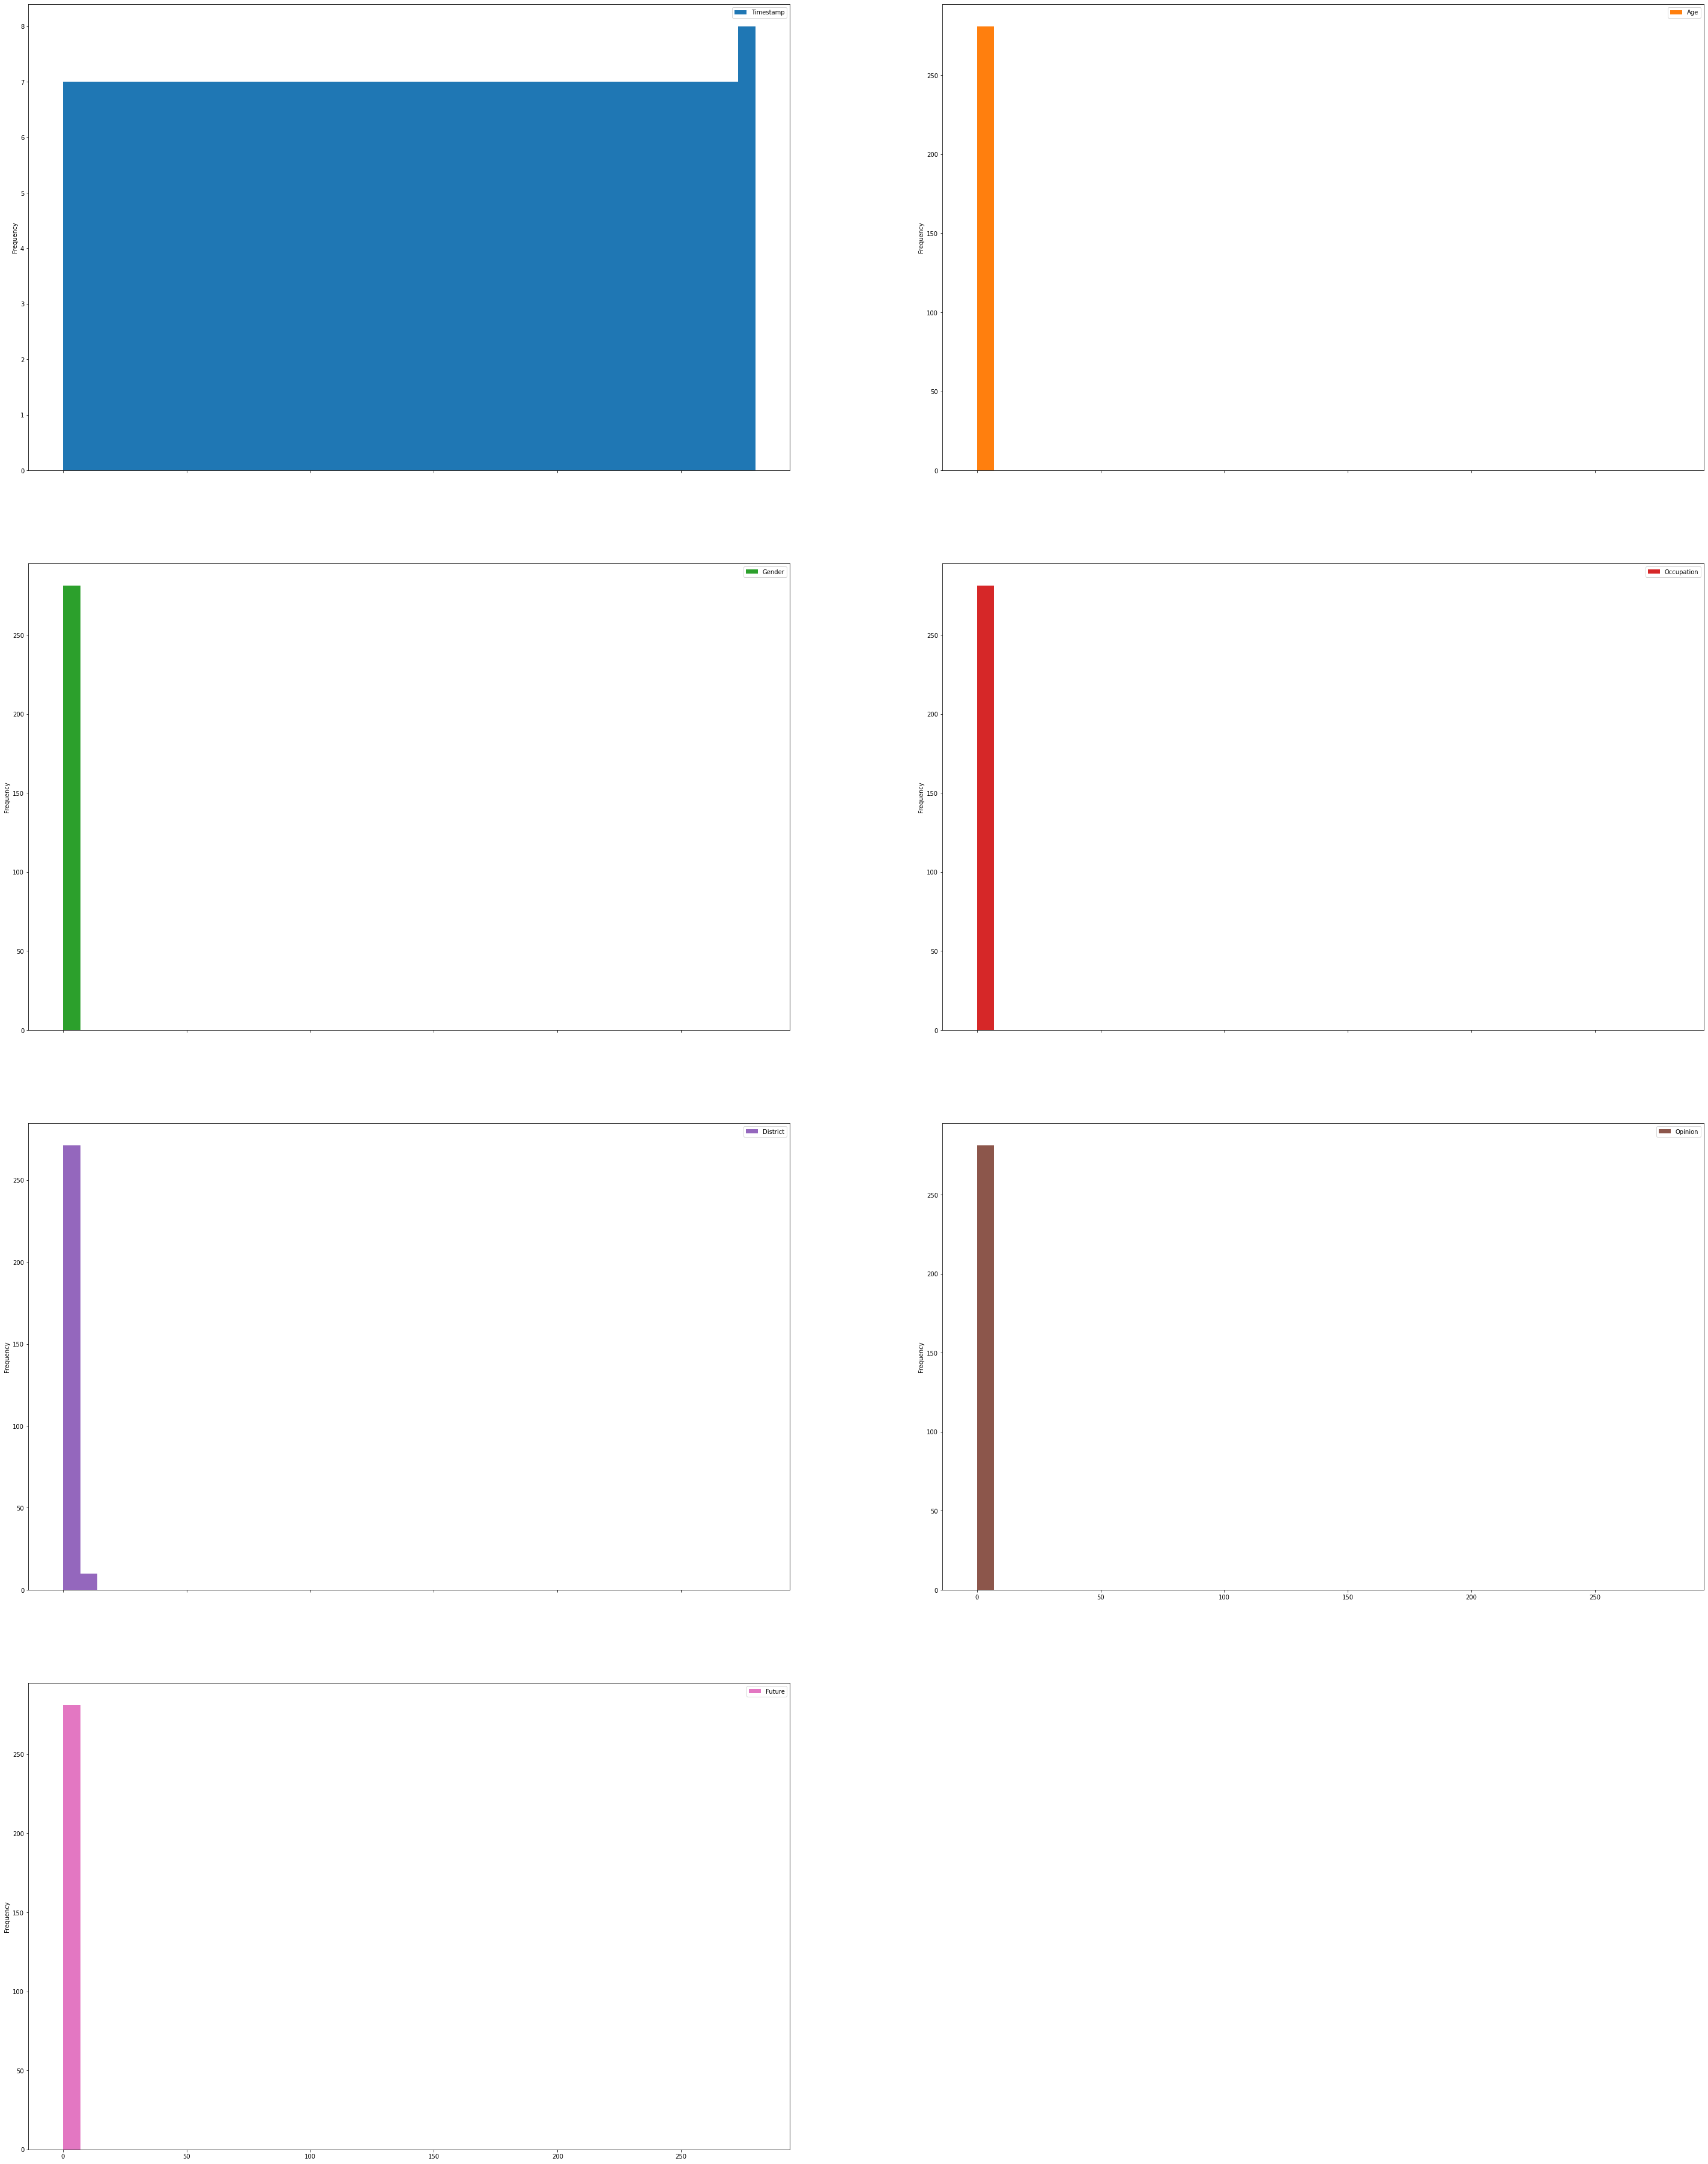

In [60]:
df.plot.hist(subplots=True, layout=(6,2), figsize=(50, 100), bins=40)

In [61]:
df.groupby("Age").Age.mean().sort_values(ascending=False)[:5].plot.bar()

In [62]:
df.groupby("Age").Gender.mean().sort_values(ascending=False)[:5].plot.bar()

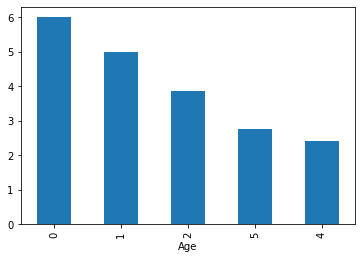

In [63]:
df.groupby("Age").Occupation.mean().sort_values(ascending=False)[:5].plot.bar()

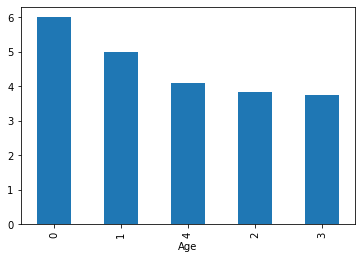

In [64]:
df.groupby("Age").District.mean().sort_values(ascending=False)[:5].plot.bar()

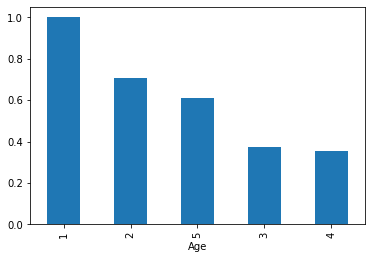

In [65]:
df.groupby("Age").Gender.mean().sort_values(ascending=False)[:5].plot.bar()

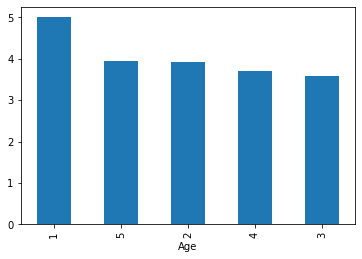

In [66]:
df.groupby("Age").Opinion.mean().sort_values(ascending=False)[:5].plot.bar()

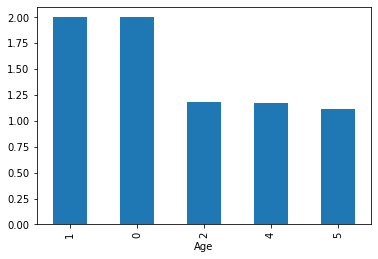

In [67]:
df.groupby("Age").Future.mean().sort_values(ascending=False)[:5].plot.bar()

In [68]:
import seaborn as sns

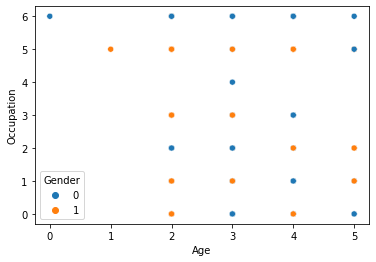

In [69]:
sns.scatterplot(x='Age', y='Occupation', hue='Gender', data=df)

In [70]:
sns.scatterplot(x='District', y='Gender', hue='Age', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


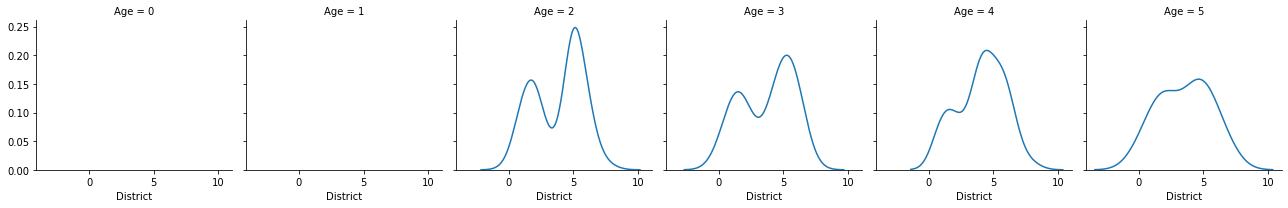

In [71]:
g = sns.FacetGrid(df, col='Age')
g = g.map(sns.kdeplot, 'District')